In [1]:
#importing necessary libraries
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#plotting using traditional calculation
from mpl_toolkits import mplot3d
from matplotlib import cm
import scipy.optimize
from scipy.stats import cauchy

[[75 75 75 ...  0  0  0]
 [75 75 75 ...  0  0  0]
 [75 75 75 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


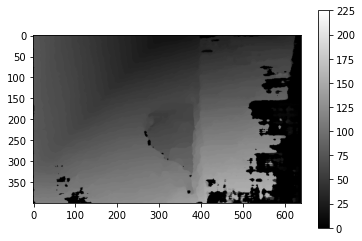

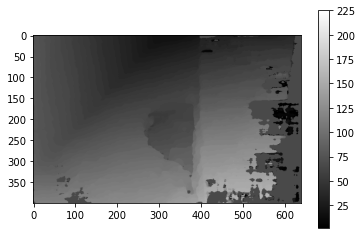

In [2]:
disparity = np.load('image_1.npy')
print(disparity)
plt.imshow(disparity, "gray")
plt.colorbar()
plt.show()
sum_dis = 0
disp_no =0
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        sum_dis= sum_dis + disparity[i][j]
        disp_no = disp_no + 1
avg_dis = sum_dis/disp_no
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        if(disparity[i][j] == 0):
            disparity[i][j] = avg_dis
plt.imshow(disparity, "gray")
plt.colorbar()
plt.show()

[75 75 75 ... 66 66 66]


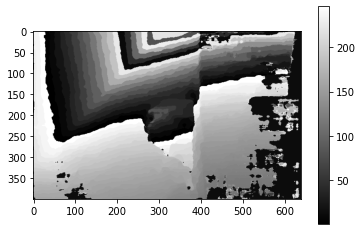

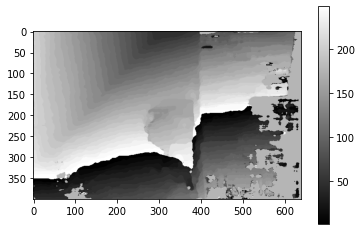

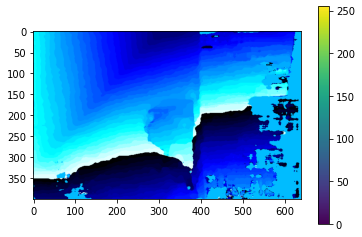

In [4]:
image_centre_h = disparity.shape[0]/2
image_centre_w = disparity.shape[1]/2
d = disparity.flatten()
print(d)

''' Projects points from 2d to 3d using disparity to calculate Z coordinates'''

points = []

# f = 800.74853515625
f = 882.5
B = 7.5
maxdisp = 95
height1, width1 = disparity.shape[:2]

# assume a minimal disparity of 2 pixels is possible to get Zmax
# and then get reasonable scaling in X and Y output

#Zmax = ((f * B) / 2)
a=0
x3d=[]
y3d=[]
z3d=[]

for y in range(height1):# 0 - height is the y axis index
    for x in range(width1):# 0 - width is the x axis index

        # if we have a valid non-zero disparity
        if (disparity[y,x] > 0 or disparity[y,x] < 0):

            # calculate corresponding 3D point [X, Y, Z]

            Z = (f * B) / disparity[y,x]
            Zacc = ((Z*255. )/maxdisp).astype(np.uint8)
#             X = ((x - image_centre_w) * B) / disparity[y,x]
#             Y = ((y - image_centre_h) * B) / disparity[y,x]

            X = ((x - image_centre_w) * Zacc) / f
            Y = ((y - image_centre_h) * Zacc) / f

            # add to points
            x3d.append(X)
            y3d.append(Y)
            z3d.append(Zacc)

#             if(left_img_rect.size > 0):
#                 points.append([X,Y,Z,left_img_rect[y,x]])
#             else:
            points.append([X,Y,Z])
frame = np.reshape(z3d,(height1,width1))
plt.imshow(frame, "gray")
plt.colorbar()
plt.show()

maxdisp = 95
dis = (disparity * 255. / maxdisp).astype(np.uint8)
plt.imshow(dis , "gray")
plt.colorbar()
plt.show()

fra = cv2.applyColorMap(dis, cv2.COLORMAP_HOT)
plt.imshow(fra)
plt.colorbar()
plt.show()

z_act = np.copy(z3d)

Average 118.88649609375


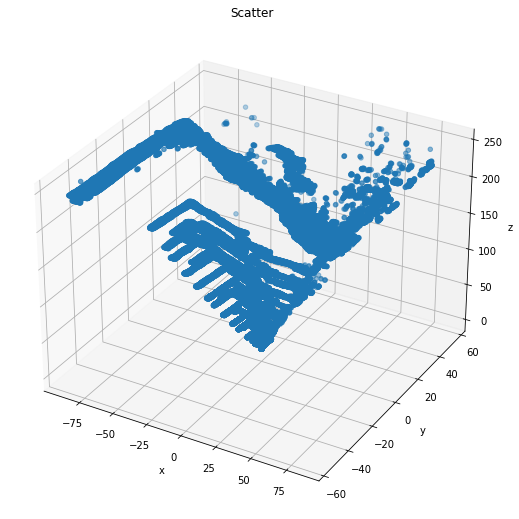

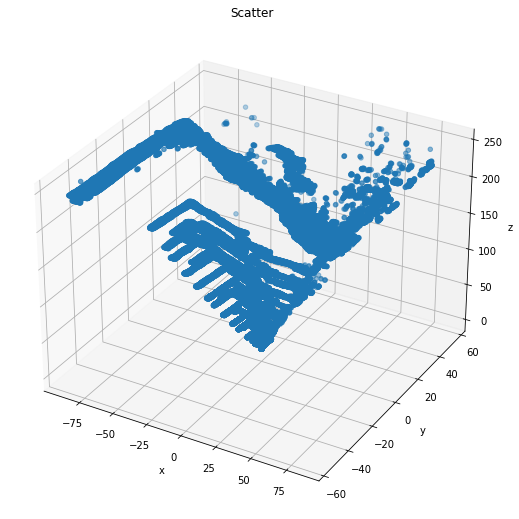

In [5]:
depth = z3d
#di = -depth
fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
# ax.plot_surface(z1,x1,y1,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(Z1))
# surf3 = ax.plot_surface(z1, x1, y1,
#                        cmap = my_cmap,
#                        edgecolor ='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


u = 0
l = 0
z_avg =sum(z_act)/len(z3d)
    
print("Average", z_avg)

# for i in range(len(z_b)):
#     if z_b[i] < z_avg - 30:
#         z_b[i] = z_avg

# for i in range(len(z3d)):
#     if z3d[i] < z_avg:
#         z3d[i] = z_avg

        
ax.scatter(x3d, y3d , z3d)
# fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()
fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x3d, y3d , z_act)
# fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()

In [9]:
sx1=0
SMx =[]
sy1=0
SMy =[]
sy2=0
SMy2 =[]
sx2=0
SMx2 =[]
sx3=0
SMx3 =[]
sxy=0
SMxy =[]
sx2y=0
SMx2y =[]
sxy2=0
SMxy2 =[]
sy3=0
SMy3 =[]
sx4 = 0
SMx4=[]
sy4 = 0
SMy4=[]
sx3y = 0
SMx3y=[]
sx3y2 = 0
SMx3y2=[]
sx2y2=0
SMx2y2 =[]
sxy3=0
SMxy3 =[]
sz1=0
SMz1 =[]
sxz=0
SMxz =[]
szy=0
SMzy =[]
sx2z=0
SMx2z =[]
sxyz =0
SMxyz = []
sy2z=0
SMy2z =[]
sz1=0
SMz=[]
s=0
for i in range(len(x3d)):
    s= s+i
    sx1 = sx1 + x3d[i]
    SMx.append(sx1)
    sy1 = sy1 + y3d[i]
    SMy.append(sy1)
    sx2 = sx2+ x3d[i]**2
    SMx2.append(sx2)
    sy2 = sy2 + y3d[i]**2
    SMy2.append(sy2)
    sxy = sxy + x3d[i]*y3d[i]
    SMxy.append(sxy)
    sx3 = sx3+ x3d[i]**3
    SMx3.append(sx3)
    sx2y = sx2y+ (x3d[i]**2)*(y3d[i])
    SMx2y.append(sx2y)
    sxy2 = sxy2 + (x3d[i])*(y3d[i]**2)
    SMxy2.append(sxy2)
    sy3 = sy3 + y3d[i]**3
    SMy3.append(sy3)
    sx4 = sx4 + x3d[i]**4
    SMx4.append(sx4)
    sy4 = sy4 + y3d[i]**4
    SMy4.append(sy4)
    sx3y2 = sx3y2 +(x3d[i]**3)*(y3d[i]**2)
    SMx3y2.append(sx3y2)
    sx3y = sx3y + (x3d[i]**3)*(y3d[i])
    SMx3y2.append(sx3y)
    sx2y2 = sx2y2 + (x3d[i]**2)*(y3d[i]**2)
    SMx2y2.append(sx2y2)
    sxy3 = sxy3 + (x3d[i])*(y3d[i]**3)
    SMxy3.append(sxy3)
    sz1 = sz1 + z3d[i]
    SMz.append(sz1)
    sxz = sxz + x3d[i]*z3d[i]
    SMxz.append(sxz)
    szy = szy + z3d[i]*y3d[i]
    SMzy.append(szy)
    sx2z = sx2z + (x3d[i]**2)*(z3d[i])
    SMx2z.append(sx2z)
    sxyz = sxyz + (x3d[i])*(y3d[i])*(z3d[i])
    SMxyz.append(sxyz)
    sy2z = sy2z + (y3d[i]**2)*(z3d[i])
    SMy2z.append(sy2z)
#plot using ridge regression
reg1 = linear_model.Ridge()
reg1.fit([[s,sx1,sy1,sx2,sxy,sy2],[sx1,sx2,sxy,sx3,sx2y,sxy2],[sy1,sxy,sy2,sx2y,sxy2,sy3],[sx2,sx3,sx2y,sx4,sx3y2,sx3y],[sxy,sx2y,sxy2,sx3y,sx2y2,sxy3],[sy2,sxy2,sy3,sx2y2,sxy3,sy4]], [[sz1],[sxz],[szy],[sx2z],[sxyz],[sy2z]])
print(reg1)
amat1=reg1.coef_
# reg1.intercept_
print(amat1)

Ridge()
[[ 2.54725795e-04  9.73912931e-02  9.61447778e-01  1.09043550e-02
  -1.04125040e-02  1.64943597e-01]]


[[444.27464974 443.95131828 443.62954647 ...  -0.56481739  -0.56142828
   -0.55803443]
 [440.06349598 439.73941988 439.41690342 ...  -0.56565191  -0.56226506
   -0.55887347]
 [435.87593396 435.55111322 435.22785212 ...  -0.56641485  -0.56303025
   -0.55964092]
 ...
 [  4.10508329   4.10456081   4.10404306 ...   4.73089691   4.73338901
    4.73588584]
 [  4.13410736   4.13358262   4.13306261 ...   4.75848168   4.76097152
    4.76346609]
 [  4.16320302   4.16267602   4.16215375 ...   4.78613804   4.78862561
    4.79111792]]


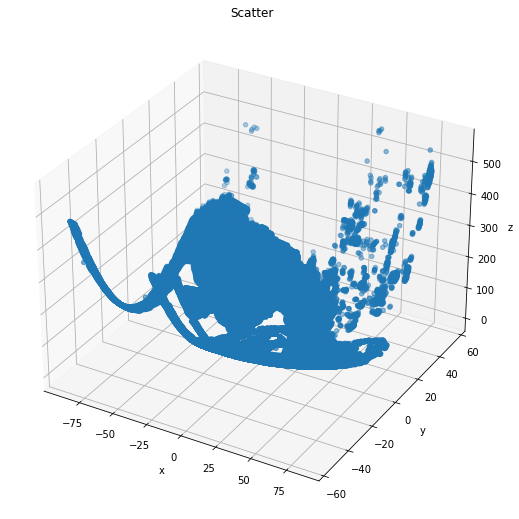

[[-75.         -75.         -75.         ... -75.         -75.
  -75.        ]
 [-70.16129032 -70.16129032 -70.16129032 ... -70.16129032 -70.16129032
  -70.16129032]
 [-65.32258065 -65.32258065 -65.32258065 ... -65.32258065 -65.32258065
  -65.32258065]
 ...
 [ 65.32258065  65.32258065  65.32258065 ...  65.32258065  65.32258065
   65.32258065]
 [ 70.16129032  70.16129032  70.16129032 ...  70.16129032  70.16129032
   70.16129032]
 [ 75.          75.          75.         ...  75.          75.
   75.        ]]


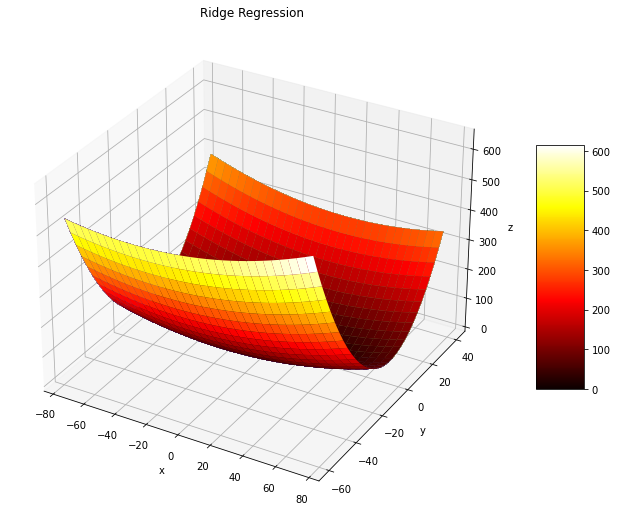

In [17]:
X1=np.reshape(x3d,(height1 , width1))
Y1=np.reshape(y3d,(height1 , width1))
depthp = amat1[0,0]+ amat1[0,1]*X1 + amat1[0,2]*Y1 +  amat1[0,3]*X1*X1 + amat1[0,4]*X1*Y1 + amat1[0,5]*Y1*Y1
print(depthp)
depthplot = depthp.flatten()
fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
# ax.plot_surface(z1,x1,y1,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(Z1))
# surf3 = ax.plot_surface(z1, x1, y1,
#                        cmap = my_cmap,
#                        edgecolor ='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x3d, y3d , depthplot)
# fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()

x1 = np.outer(np.linspace(-75, 75, 32), np.ones(32))
print(x1)
# z1 = x1.copy().T # transpose
y1 = np.outer(np.linspace(-60, 40, 32), np.ones(32)).T
z1 = amat1[0,0]+ amat1[0,1]*x1 + amat1[0,2]*y1 +  amat1[0,3]*x1*x1 + amat1[0,4]*x1*y1 + amat1[0,5]*y1*y1

# Creating figure
fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
my_cmap = plt.get_cmap('hot')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Ridge Regression')
ax.plot_surface(x1,y1,z1,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(y1))
surf3 = ax.plot_surface(x1, y1, z1,
                       cmap = my_cmap,
                       edgecolor ='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.scatter(Z1, X1, Y1)
# ax.scatter(x3d, y3d, disparity)
fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()
# show plot

In [58]:
mean, var, skew, kurt = cauchy.stats(moments='mvsk')
a = np.linspace(cauchy.ppf(0.01),
                 cauchy.ppf(0.99), 100)
ax.plot(x, cauchy.pdf(x),
       'r-', lw=5, alpha=0.6, label='cauchy pdf')
rv = cauchy()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = cauchy.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], cauchy.cdf(vals))
r = cauchy.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

[ 1.21972744e-19  1.29701920e-21  1.53524722e-21 -1.32348898e-23
 -6.61744490e-23 -1.05879118e-22]


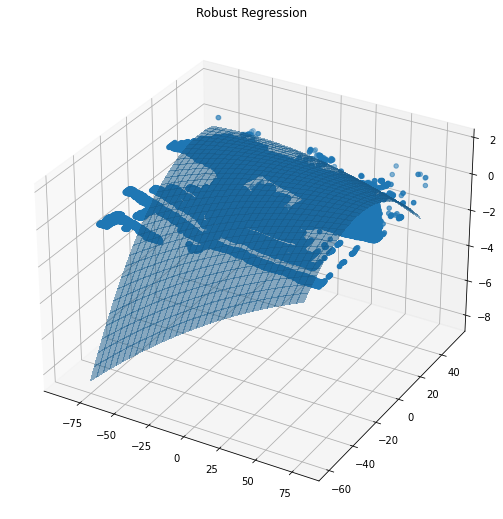

In [111]:
def fun(cf, x, y):
    return cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y


cf0 = np.ones(6)

res_robust = scipy.optimize.least_squares(fun, cf0, loss='arctan', f_scale=1.0, args=(np.array(x3d), np.array(y3d)))

# res_robust = scipy.optimize.least_squares(fun, cf0, loss='cauchy', f_scale=1.0, args=(np.array([[s,sx1,sy1,sx2,sxy,sy2],[sx1,sx2,sxy,sx3,sx2y,sxy2],[sy1,sxy,sy2,sx2y,sxy2,sy3],[sx2,sx3,sx2y,sx4,sx3y2,sx3y],[sxy,sx2y,sxy2,sx3y,sx2y2,sxy3],[sy2,sxy2,sy3,sx2y2,sxy3,sy4]]), np.array([[sz1],[sxz],[szy],[sx2z],[sxyz],[sy2z]])))
# print(res_robust)

x = np.linspace(-75, 75, 32)

y = np.linspace(-60, 40, 32)

xv, yv = np.meshgrid(x, y)
cfs = res_robust.x
print(cfs)
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
ax.plot_surface(xv, yv, fun(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
ax.scatter3D(x3d, y3d, zp)
plt.show()

167 195.09219820092497
167 195.05829489565642
167 195.02517255884385
167 194.99283119048727
167 194.96127079058664
167 194.930491359142
167 194.9004928961533
167 194.8712754016206
167 194.84283887554386
167 194.81518331792307
167 194.7883087287583
167 194.76221510804947
167 194.7369024557966
167 194.7123707719997
167 194.6886200566588
167 194.66565030977387
167 194.64346153134488
167 194.62205372137188
167 194.60142687985484
171 205.34649487655653
171 205.37927756918938
171 205.41287908998464
171 205.44729943894228
171 205.48253861606233
171 205.51859662134478
171 205.5554734547896
171 205.59316911639684
171 205.63168360616643
171 205.67101692409847
171 205.71116907019288
171 205.75214004444967
171 205.79392984686888
171 205.8365384774505
171 205.87996593619448
171 205.92421222310088
171 205.96927733816966
171 228.39426215990534
171 228.59162931317965
171 228.78981529461635
171 228.98882010421542
171 229.18864374197693
171 229.3892862079008
171 229.5907475019871
171 229.79302762423578


171 177.43705865862648
171 177.4754038053307
171 177.5145677801973
171 177.55455058322627
171 177.59535221441766
171 190.92555830675963
171 191.07935822436156
171 191.2339769701259
171 191.3894145440526
171 193.6515175360782
171 193.81923753244087
171 193.9877763569659
171 195.89574608545948
172 199.48138811720094
172 199.66670471190469
171 202.00955725316874
188 215.45685483673154
188 215.42445887144368
188 215.39305263504923
188 215.36263612754817
188 215.3332093489405
188 215.30477229922624
188 215.27732497840537
188 215.25086738647786
188 215.22539952344377
188 215.20092138930306
188 215.17743298405577
188 215.15493430770186
188 215.13342536024132
188 215.1129061416742
188 215.09337665200044
188 215.07483689122012
171 175.06502894074035
171 175.09643251506537
171 175.12865491755284
171 175.16169614820268
171 175.1955562070149
171 175.23023509398956
171 175.26573280912658
171 175.302049352426
171 175.33918472388783
171 175.37713892351204
171 175.41591195129865
171 175.45550380724765

188 195.80199250174013
188 195.76680592032466
188 195.73260906780257
188 195.69940194417387
188 195.6671845494386
188 195.6359568835967
188 195.60571894664815
188 195.57647073859306
188 195.54821225943132
188 195.52094350916298
188 195.49466448778804
188 195.4693751953065
188 195.44507563171834
188 195.42176579702357
171 171.10998117685074
171 171.25534960175844
171 171.40153685482855
171 171.54854293606104
188 219.09897873971875
188 219.3171627550118
188 219.53633649919828
188 219.75649997227814
188 219.97765317425137
188 228.08575073291072
188 228.34154444615274
188 228.5983278882881
188 228.8561010593169
188 229.1148639592391
188 229.37461658805466
188 229.63535894576364
188 229.89709103236598
188 230.15981284786173
188 230.42352439225087
188 230.68822566553342
188 230.95391666770934
188 231.22059739877866
188 231.48826785874138
188 231.75692804759748
188 232.026577965347
188 232.29721761198988
188 232.56884698752617
188 232.84146609195585
188 233.11507492527892
188 233.389673487495

188 209.06901824288326
188 209.3240007977844
188 209.57997308157894
188 209.8369350942669
188 210.35382830632295
188 210.6137595056911
188 210.8746804339526
188 211.1365910911075
188 211.3994914771558
188 211.92826143593257
188 212.19413100866106
188 212.4609903102829
167 199.77726357542963
188 202.9641198237819
188 203.44443770942058
188 205.9054108712175
188 206.15695169631084
188 206.40948225029757
188 206.66300253317772
188 206.91751254495125
188 207.17301228561817
188 207.42950175517848
188 207.6869809536322
188 207.94544988097928
188 208.20490853721978
188 208.4653569223537
188 208.72679503638096
188 208.98922287930162
188 209.2526404511157
188 209.51704775182313
188 209.78244478142398
188 210.04883153991824
167 197.84462515045294
188 199.63329444057766
188 199.86852706024908
188 200.10474940881392
188 200.34196148627214
188 200.58016329262375
188 201.05953609200716
188 201.30070708503897
188 203.26570526945545
188 203.5157838225278
188 203.76685210449352
188 204.01891011535264
1

224 227.53321466838122
224 227.76451730493278
224 227.99722500703874
224 228.2313377746991
224 228.46685560791389
224 228.70377850668302
224 228.9421064710066
224 229.1818395008846
224 229.42297759631697
224 224.23663085084772
224 224.46585757745908
224 224.69648936962483
224 224.92852622734497
224 225.16196815061954
224 225.3968151394485
224 225.63306719383186
224 225.87072431376964
224 226.10978649926182
230 249.8109833028574
230 249.47579821425072
230 249.1420944706661
230 247.9293038916602
230 247.58896750419558
230 247.25011246175313
230 246.9127387643327
230 246.57684641193435
230 246.2424354045581
230 245.3981135528922
230 245.05558855661388
230 244.71454490535768
230 244.37498259912354
230 244.0369016379115
230 243.7003020217215
230 243.36518375055365
230 242.54751289374104
230 242.2042806336711
230 241.86252971862325
230 241.52226014859752
230 241.1834719235938
230 240.8461650436122
230 240.5103395086527
230 239.71931964669352
230 239.37538012283198
230 239.03292194399248
230 

214 235.4223990620475
214 234.99548311007533
214 234.56984957165008
214 234.1454984467717
214 233.72242973544024
214 233.30064343765574
214 232.88013955341808
214 232.46091808272735
214 232.04297902558352
214 231.6263223819866
214 231.21094815193658
214 230.79685633543346
214 230.38404693247725
214 229.97251994306797
214 229.56227536720556
214 229.15331320489005
214 228.74563345612148
214 228.3392361208998
214 227.93412119922505
214 227.53028869109716
214 227.12773859651617
214 226.72647091548214
214 226.32648564799496
214 225.92778279405468
209 215.60172989488493
214 225.13422432681494
214 224.73936871351538
214 224.34579551376277
214 223.95350472755703
214 223.56249635489823
214 223.1727703957863
214 222.78432685022128
209 212.6175451051387
209 212.25002635128988
209 211.8837307851898
209 211.51865840683848
209 211.15480921623595
209 210.79218321338215
209 210.4307803982771
209 210.07060077092086
209 209.71164433131335
209 209.3539110794546
225 231.4662086525845
225 231.8492536528529

201 217.6502313617019
201 217.3130852549468
201 216.97707048694855
201 216.64218705770713
201 216.30843496722258
201 215.97581421549484
201 215.64432480252398
201 215.31396672830996
201 214.98473999285278
201 214.65664459615243
201 214.32968053820895
201 214.0038478190223
201 213.6791464385925
201 213.35557639691956
195 201.16021214597689
195 200.85844338936505
195 200.55773943699643
195 200.25810028887096
195 199.9595259449887
195 199.66201640534962
195 199.36557166995374
195 199.07019173880104
195 198.77587661189153
195 198.4826262892252
195 198.19044077080207
195 197.89932005662212
195 197.60926414668538
195 197.32027304099182
195 197.03234673954142
195 196.74548524233424
201 243.7620763123507
201 243.35311570957697
201 242.94528644556004
201 242.53858852029998
201 242.1330219337968
201 241.72858668605042
201 241.32528277706092
201 240.92311020682826
201 240.52206897535243
201 240.12215908263343
201 239.72338052867133
201 239.325733313466
201 238.9292174370176
201 238.533832899326
2

195 235.01494440876073
195 234.66332196864423
195 234.31276433277094
195 233.9632715011408
195 233.61484347375392
195 233.26748025061016
195 232.92118183170962
195 232.57594821705226
195 232.2317794066381
195 231.88867540046712
195 231.54663619853932
195 231.20566180085473
195 230.86575220741332
195 230.5269074182151
195 230.18912743326007
195 229.85241225254822
195 229.51676187607956
195 229.18217630385408
195 228.84865553587179
195 228.5161995721327
195 228.1848084126368
195 227.85448205738408
195 227.52522050637458
195 227.19702375960821
195 226.8698918170851
195 226.5438246788051
195 226.21882234476834
195 225.89488481497474
195 225.57201208942436
195 225.25020416811716
195 224.92946105105312
195 224.6097827382323
195 224.29116922965466
195 223.97362052532023
195 223.65713662522896
195 223.34171752938087
195 223.027363237776
195 222.7140737504143
195 222.4018490672958
195 222.09068918842047
195 221.16359837725366
191 212.36429219931222
191 212.07130714400697
191 211.77934365671211


191 241.0907963653227
191 240.75762064930478
191 240.42546650129728
191 240.0943339213002
191 239.7642229093135
191 239.43513346533723
191 239.10706558937136
191 238.78001928141592
191 238.45399454147085
191 238.1289913695362
191 237.80500976561194
191 237.48204972969813
191 237.16011126179473
191 236.83919436190172
191 236.5192990300191
195 245.67997754610678
195 245.34822208592382
191 229.44365916759185
191 229.14828146795904
185 213.01651110767335
185 212.75058336809354
179 199.68401029870003
179 199.43748735351093
179 199.19186164416024
179 198.947133170648
179 198.70330193297417
179 198.46036793113876
179 198.21833116514176
179 197.9771916349832
179 197.73694934066305
174 187.2575314227949
174 187.03275503741926
174 186.80882646304343
174 186.58574569966737
174 186.3635127472911
174 186.14212760591462
174 185.9215902755379
174 185.701900756161
174 185.48305904778385
174 185.26506515040649
174 185.04791906402892
174 184.83162078865115
174 184.61617032427316
174 184.40156767089493
1

167 174.65530737187447
167 174.82005978127995
167 174.98559315914142
185 237.9587617425451
185 237.66279589979814
191 249.69333797352613
185 234.75584913274346
185 234.47042562207946
191 248.77857401342646
191 248.47569582941406
191 248.17383921341207
191 247.87300416542047
191 247.5731906854393
191 247.27439877346853
191 246.97662842950814
191 246.6798796535582
179 217.9398998547104
179 217.6823031088274
179 217.16980132457667
179 216.91489628620894
179 216.66088848367966
174 205.15665485851125
174 204.9188712471895
174 204.68193544686747
174 204.44584745754526
174 204.21060727922284
174 203.9762149119002
174 203.74267035557733
174 203.5099736102543
174 203.278124675931
174 203.0471235526075
174 202.81697024028375
170 193.92369708598494
170 193.70605374988378
170 193.48921969301017
170 193.27319491536412
170 193.05797941694564
170 192.84357319775472
170 192.62997625779138
170 192.4171885970556
170 192.20521021554737
170 191.99404111326672
170 191.78368129021362
174 200.12125975038228


179 234.29439176327833
179 234.02704683513244
179 232.44181921886403
179 232.18075494158708
174 219.84402021542758
174 219.59956884000798
174 219.35596527558812
174 219.1132095221681
174 218.8713015797478
174 218.63024144832733
170 209.02910016689424
170 208.80104571070135
170 208.57380053373603
170 208.3473646359983
170 208.1217380174881
170 207.8969206782055
170 207.67291261815043
170 207.44971383732295
170 207.227324335723
170 207.00574411335066
170 206.7849731702059
170 206.56501150628864
170 206.34585912159898
170 206.1275160161369
170 205.90998218990234
170 205.6932576428954
170 205.47734237511597
170 205.26223638656413
170 205.04793967723987
170 204.83445224714313
170 204.621774096274
170 204.4099052246324
170 204.19884563221842
170 203.98859531903196
170 203.77915428507305
170 203.57052253034175
170 203.362700054838
170 203.1556868585618
170 202.94948294151317
170 202.7440883036921
170 202.5395029450986
170 202.33572686573268
170 202.1327600655943
170 201.9306025446835
170 201.

166 202.11190777927692
166 201.92468537656964
166 201.73823461740545
161 190.34422909471238
161 190.17082804267386
161 189.99815284969614
161 189.82620351577924
161 189.6549800409232
161 189.48448242512794
161 189.3147106683935
161 189.1456647707199
161 188.9773447321071
161 188.80975055255513
161 188.64288223206398
161 188.47673977063366
161 188.31132316826415
161 188.14663242495544
161 187.9826675407076
161 187.81942851552054
161 187.65691534939432
161 187.49512804232893
161 187.33406659432433
161 187.17373100538055
161 187.01412127549762
161 186.85523740467548
161 186.6970793929142
161 186.5396472402137
161 186.38294094657402
161 186.2269605119952
161 186.07170593647717
161 185.91717722001997
161 185.76337436262358
161 185.61029736428804
161 185.4579462250133
161 185.30632094479935
161 185.15542152364625
161 185.00524796155398
161 184.85580025852252
161 184.7070784145519
161 184.55908242964205
161 184.41181230379306
161 184.2652680370049
161 184.11944962927754
161 183.974357080611
1

161 177.34626913395095
161 177.3420587241736
161 177.33857417345706
161 177.33581548180135
161 177.33378264920646
161 177.33247567567238
161 177.33189456119914
161 177.3320393057867
161 177.3329099094351
161 177.3345063721443
161 177.33682869391433
161 177.3398768747452
161 177.34365091463684
161 177.34815081358934
144 144.7145713039155
144 144.72101041002225
144 144.72803018097542
144 144.73563061677507
144 144.74381171742118
144 144.75257348291376
141 141.83557529971986
138 139.84443872717978
138 144.6911994802855
179 244.02296967759014
179 244.24973519643538
179 244.47739795111903
174 249.83420230520798
174 249.56450780629558
170 238.56018558456802
170 238.30479815108237
170 238.05021999682424
170 237.79645112179367
170 237.5434915259907
170 237.29134120941526
170 237.04000017206744
170 236.7894684139471
170 236.53974593505438
170 236.29083273538922
170 236.04272881495163
170 235.79543417374157
170 235.54894881175912
170 235.30327272900422
170 235.05840592547688
170 234.814348401177

158 193.95083102960388
158 193.8066528893766
158 193.66317380958657
158 193.5203937902338
158 193.3783128313183
158 193.2369309328401
158 193.0962480947991
158 192.9562643171954
158 192.81697960002896
158 192.6783939432998
154 183.572200391477
154 183.44230139142036
154 183.3130665043797
154 183.18449573035497
158 191.99595156621288
158 191.86156027210728
158 191.72786803843894
158 191.59487486520788
158 191.46258075241408
158 191.33098570005754
158 191.20008970813828
158 191.06989277665627
158 190.94039490561153
158 190.81159609500403
158 190.68349634483383
158 190.55609565510088
158 190.42939402580518
158 190.30339145694677
158 190.1780879485256
158 190.0534835005417
158 189.92957811299505
158 189.8063717858857
158 189.68386451921359
158 189.56205631297874
158 189.44094716718115
158 189.32053708182087
158 189.20082605689782
154 180.29803105854626
154 180.18606310992027
154 180.0747592743102
154 179.9641195517161
154 179.85414394213794
154 179.74483244557575
154 179.63618506202948
154

148 168.4844403622643
148 168.4271084430826
148 168.37038989594933
148 168.31428472086455
148 168.2587929178282
150 172.406011092457
148 168.14964942790093
150 172.2947105716565
150 172.2400054037798
148 167.9905344833735
148 167.93872291262792
148 167.88752471393084
148 167.8369398872822
148 167.78696843268204
148 167.73761035013032
148 167.6888656396271
148 167.6407343011723
148 167.593216334766
148 167.54631174040816
148 167.50002051809875
148 167.45434266783784
148 167.40927818962535
148 167.36482708346136
148 167.32098934934584
148 167.27776498727877
148 167.23515399726014
148 167.19315637929
148 167.1517721333683
148 167.11100125949508
148 167.07084375767033
148 167.03129962789404
148 166.9923688701662
148 166.95405148448683
148 166.91634747085592
148 166.8792568292735
148 166.84277955973948
148 166.80691566225397
148 166.77166513681692
148 166.73702798342833
148 166.7030042020882
148 166.66959379279652
148 166.63679675555332
148 166.60461309035858
144 158.4264605731276
144 158.3

144 166.5979549161846
144 166.6486816991758
144 166.69998914701344
144 166.75187725969755
144 166.8043460372281
148 175.39562059914817
144 166.91102558682863
148 175.74200463914877
135 148.76500532901736
148 176.36838113636014
148 176.43439233234784
148 176.50101690038397
135 151.22865570851002
135 151.30070914223293
116 117.58175715829982
114 114.05969912427611
114 114.12759341686512
114 114.19585163308186
114 114.26447377292634
114 114.33345983639855
116 118.00558554078575
161 237.92863186388348
161 237.70651361987223
161 237.4851212349218
161 237.2644547090322
158 228.7851738453694
158 228.5743773263407
158 228.3642798677493
158 228.15488146959513
158 227.94618213187823
158 227.73818185459862
158 227.53088063775624
161 235.52525342810492
161 235.3111196337627
161 235.0977116984813
161 234.88502962226073
161 234.67307340510095
161 234.46184304700202
161 234.2513385479639
158 222.38641921333428
158 222.19799262829804
158 222.01026510369906
158 221.82323663953736
158 221.63690723581288

135 154.3191686398049
148 182.4657948196466
148 182.55207495994773
170 237.76310825258432
114 115.21628059015815
114 115.27836851981566
114 115.40363615001385
114 115.46681585055455
114 115.53035947472297
114 115.59426702251913
114 116.11862865548673
114 116.18581151593247
112 112.64465923551774
112 112.71042485799028
112 112.77654174685144
112 112.84300990210119
112 112.90982932373953
114 116.59655107478926
112 113.04452196618203
114 116.7363756500967
161 243.96065671622375
161 243.732764340271
161 243.505597823379
161 243.27915716554784
161 243.05344236677752
161 242.828453427068
161 242.60419034641933
161 242.38065312483147
161 242.15784176230443
158 233.50159716615184
158 233.28873499757964
158 233.07657188944472
158 232.86510784174703
158 232.65434285448663
158 232.4442769276635
158 232.23491006127765
158 232.02624225532904
161 240.18520315729793
161 239.9696503853791
161 239.75482347252108
161 239.54072241872387
161 239.3273472239875
161 239.11469788831192
161 238.90277441169718


161 249.36560915509557
158 240.4498279126809
158 240.2345663302307
158 240.02000380821778
158 239.80614034664214
158 239.59297594550375
158 239.38051060480262
158 239.16874432453878
158 238.95767710471216
161 247.370547987031
161 247.1525038192168
161 246.93518551046344
161 246.7185930607709
161 246.50272647013918
161 246.28758573856828
161 246.07317086605818
161 245.85948185260892
161 245.64651869822046
161 245.43428140289285
161 241.73813198639596
158 233.14081901995073
158 232.95072361324205
158 232.76132726697062
158 232.5726299811365
158 232.38463175573958
158 232.19733259077998
158 232.0107324862576
158 231.82483144217252
158 231.6396294585247
158 231.45512653531415
161 239.5951485298487
161 239.40468700634568
161 239.2149513419035
161 239.0259415365221
158 230.54309782582027
158 230.3627892652333
158 230.18317976508357
158 230.00426932537113
158 229.82605794609594
158 229.648545627258
158 229.47173236885735
158 229.29561817089393
158 229.1202030333678
158 228.94548695627893
158 

158 242.12680516559817
158 241.9346756411143
158 241.74324517706765
158 241.55251377345832
158 241.3624814302862
158 241.1731481475514
158 238.0614385879606
158 237.88468839309652
154 226.53894901705695
154 226.37279340001555
154 226.20730189599013
154 226.04247450498065
154 225.8783112269871
154 225.7148120620095
154 225.5519770100479
154 225.3898060711022
154 225.22829924517248
154 225.0674565322587
154 224.90727793236084
154 224.74776344547897
154 224.58891307161304
154 224.43072681076302
154 224.273204662929
154 224.1163466281109
154 223.96015270630875
154 223.80462289752256
154 223.64975720175232
154 223.49555561899803
154 223.34201814925967
154 223.18914479253726
154 223.03693554883083
154 222.88539041814033
154 222.73450940046578
154 222.58429249580718
154 222.43473970416454
150 211.61346632838865
150 211.4732717083199
150 211.33370714993353
150 211.1947726532295
150 211.05646821820784
150 210.91879384486856
150 210.7817495332116
150 210.64533528323705
150 210.5095510949448
150 

127 148.800937906715
127 148.80085500387983
127 148.8012237572613
127 148.80204416685945
127 148.80331623267426
127 148.8050399547057
127 148.80721533295383
127 148.80984236741858
127 148.81292105810002
127 148.81645140499808
127 148.82043340811285
127 148.82486706744425
127 148.8297523829923
127 148.835089354757
127 148.84087798273836
123 140.45214213230582
120 134.3208352788247
120 134.32794302426566
120 134.3354540091833
120 134.3433682335777
120 134.35168569744877
120 134.3604064007966
120 134.36953034362108
118 130.36198327890088
118 130.37180248326803
118 130.38201159780695
118 130.39261062251768
118 130.40359955740018
118 130.41497840245447
118 130.42674715768052
118 130.4389058230784
116 126.49336052261089
114 122.60801261497151
114 122.62087917618848
114 122.63410966103318
114 122.64770406950561
118 130.52004592907306
114 123.69714711979047
114 123.728209862394
114 123.75963652862525
114 123.79142711848424
114 123.82358163197095
114 123.8561000690854
135 168.5983311464137
114 

130 161.34593116995978
130 161.33750291311628
130 161.3295479026031
130 161.32206613842024
130 161.31505762056764
130 161.3085223490454
130 161.30246032385344
130 161.29687154499177
130 161.2917560124604
130 161.28711372625938
130 161.28294468638865
127 154.5587131573571
127 154.55596106196566
127 154.5536606227909
127 154.55181183983277
127 154.5504147130913
127 154.54946924256652
127 154.54897542825836
127 154.54893327016688
127 154.54934276829206
127 154.5502039226339
127 154.5515167331924
127 154.55328119996753
127 154.55549732295933
127 154.5581651021678
127 154.5612845375929
127 154.5648556292347
127 154.5688783770931
127 154.5733527811682
125 150.17992700448227
123 145.84989666695185
123 145.85579214804693
120 139.47681793825507
120 139.48355882119924
118 135.31236267739948
118 135.31987759525455
118 135.3277824232814
118 135.33607716148003
118 135.34476180985047
118 135.35383636839268
118 135.3633008371067
118 135.37315521599245
118 135.38339950505002
118 135.3940337042794
118 

141 199.876108104873
141 199.81121557986012
141 199.74687977734982
141 199.683100697342
141 199.61987833983673
141 199.557212704834
141 199.4951037923338
141 199.43355160233614
141 199.372556134841
141 199.3121173898484
141 199.25223536735834
141 199.1929100673708
141 199.13414148988582
141 199.07592963490333
141 199.01827450242342
141 198.961176092446
141 198.90463440497115
141 198.84864943999884
141 198.79322119752902
141 198.73834967756176
138 190.94619658171393
138 190.89502577954087
138 190.84438826157574
138 190.7942840278186
138 190.7447130782694
138 190.69567541292813
138 190.6471710317948
138 190.59919993486946
138 190.55176212215204
138 190.50485759364258
141 198.17150664308906
141 198.1233157931522
141 198.07568166571787
141 198.02860426078607
141 197.98208357835682
141 197.93611961843007
141 197.89071238100587
141 197.84586186608422
141 197.8015680736651
141 197.7578310037485
138 190.02410453776318
138 189.9835994197491
138 189.943627585943
138 189.90418903634483
138 189.86

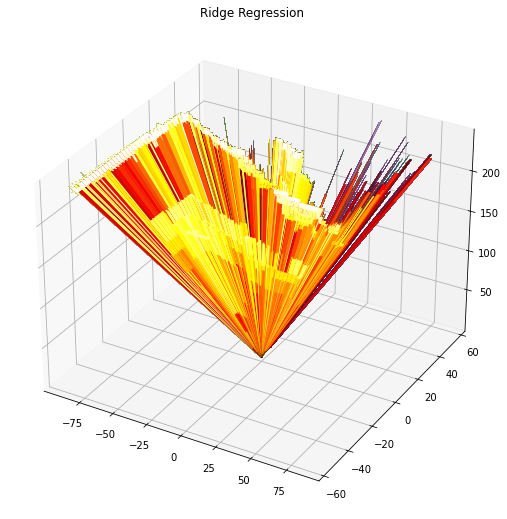

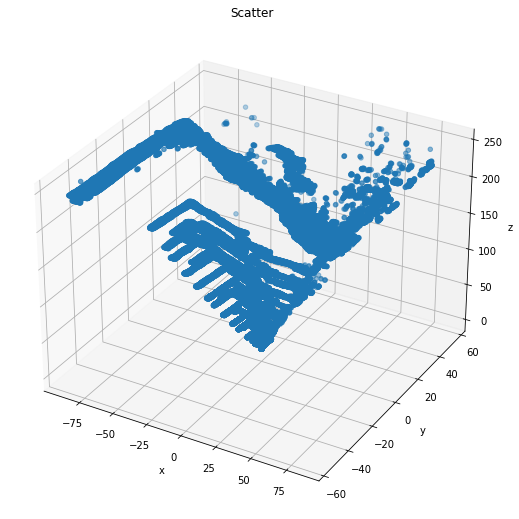

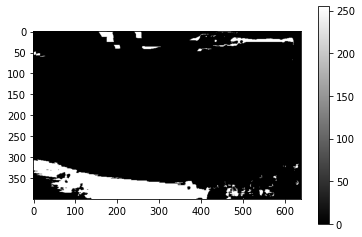

In [21]:
imgblack = np.zeros([height1,width1])
znaya =[]
zprenaya =[]
xnaya =[]
ynaya =[]
zn=[]
for y in range(height1):
    for x in range(width1):
        if (disparity[y,x] > 0):
            K = (f * B) / disparity[y,x]
            disK = (K * 255. / maxdisp).astype(np.uint8)
            znaya.append(disK)
            I = ((x - image_centre_w) * disK) / f
            xnaya.append(I)
            J = ((y - image_centre_h) * disK) / f
            ynaya.append(J)
#             zpre = fun(cfs , I , J)
            zpre = amat1[0,0]+ amat1[0,1]*I + amat1[0,2]*J +  amat1[0,3]*I*I + amat1[0,4]*I*J + amat1[0,5]*J*J
            zn.append(zpre)
#             diff = J - yc
            if(disK<zpre and zpre<250):
                imgblack[y,x] = 255
                print(disK,zpre)
                
xw = np.reshape(xnaya,(height1,width1))
yw = np.reshape(ynaya,(height1,width1))
zw = np.reshape(znaya,(height1,width1))
fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
my_cmap = plt.get_cmap('hot')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Ridge Regression')
ax.plot_surface(np.array(xw),np.array(yw),np.array(zw),linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(zw))
surf3 = ax.plot_surface(np.array(xw),np.array(yw),np.array(zw),
                       cmap = my_cmap,
                       edgecolor ='none')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# # ax.scatter(Z1, X1, Y1)
# # ax.scatter(x3d, y3d, disparity)
# fig.colorbar(surf3, shrink=0.5, aspect=5)
# plt.show()
# show plot
                
fig = plt.figure(figsize =(14, 9))
# ax = plt.axes(projection ='3d')
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(xnaya, ynaya , znaya)
# fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()
plt.imshow(imgblack , 'gray')
plt.colorbar()
plt.show()